In [145]:
%matplotlib inline 
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import log,dot,e,shape

In [73]:
titanic_data = pd.read_csv('C:/Users/taham/Desktop/7th semester/AI by Sir Ayyaz/Assignments/Titanic_data_Set.csv')

In [74]:
titanic_data.isnull().values.any()

False

In [75]:
columns = list(titanic_data)[0:-1]

In [76]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [77]:
X = titanic_data.drop('Survived',axis=1)
Y = titanic_data['Survived']
Y.shape

(891,)

In [78]:
x_train,x_test, y_train , y_test = train_test_split(X,Y,test_size = 0.3, random_state =1)

In [79]:
X.shape

(891, 7)

In [80]:
print("{}% data is in training set ".format((len(x_train)/len(titanic_data))*100))
print("{}% data is in test set ".format((len(x_test)/len(titanic_data))*100))

69.92143658810326% data is in training set 
30.07856341189675% data is in test set 


In [124]:
replace_ = SimpleImputer(missing_values=0,strategy = 'mean')
cols = x_train.columns
x_train = pd.DataFrame(replace_.fit_transform(x_train))
x_test = pd.DataFrame(replace_.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols


In [126]:
def sigmoid(z):
    return  1 / (1 + np.exp(-z))

In [148]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x_train)

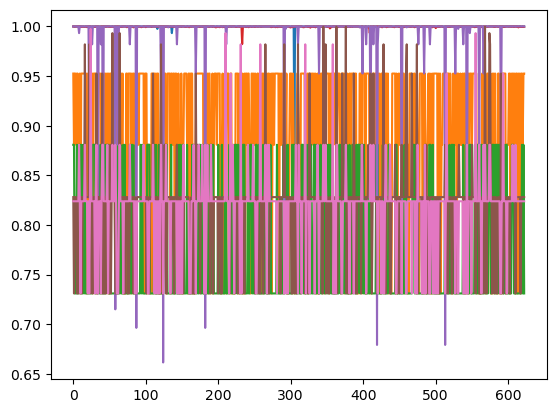

In [153]:
plt.plot(y)
  
plt.show()

In [111]:
def cost(h, Y):
    return (-Y * np.log(h) - (1 - Y) * np.log(1 - h)).mean()

In [ ]:
# X_new = X_new[cols_to_Normal].apply( lambda rec:(rec - rec.mean())/rec.std(), axis =0)


In [115]:
def gradient(x_train, h, Y):
    return np.dot(x_train.T, (h - Y)) / Y.shape[0]

In [114]:
def logistic_regression(x_train, Y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    for i in range(iters):
        h = sigmoid(np.dot(x_train, theta))
        cost_num = cost(h, Y)
        cost_array[i] = cost_num
        gradient_val = gradient(x_train, h, Y)
        theta = theta - (gradient_val * alpha)
    return theta, cost_array

In [117]:
def cost(Y, y_not):
    return - np.sum(np.dot(Y.T,np.log(1-y_not)+ np.dot((1-Y).T,np.log(1-y_not)))) / ( len(Y))

In [116]:
def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

In [123]:

theta = np.zeros(x_train.shape[1])

# define hyperparameters
alpha = 0.01
iterations = 10000

# Starting values
h = sigmoid(np.dot(x_train, theta))
print("Initial cost value for theta values {0} is: {1}".format(theta, cost(h,Y)))

# run logistic regression
theta, cost_num = logistic_regression(x_train, Y, theta, alpha, iterations)

# display cost chart
plotChart(iterations, cost_num)

# final values
h = sigmoid(np.dot(x_train, theta))
print("Final cost value for theta values {0} is: {1}".format(theta, cost(h,Y)))


ValueError: shapes (623,) and (891,) not aligned: 623 (dim 0) != 891 (dim 0)